# import python labs

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to database

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# Q1

In [4]:
sql_stat = """
    select * from gp12.student
    
"""

In [6]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,s_email,s_name,s_major
0,abcd@jmu.edu,alex,marketing
1,efgh@jmu.edu,eileen,marketing
2,ijkl@jmu.edu,ingrid,intelligence analysis
3,mnop@jmu.edu,matthew,intelligence analysis
4,s6@jmu.edu,s5,ia


# Q2

In [7]:
sql_stat = """
    select gp12.professor.p_name,
        gp12.course.course_name
    from gp12.professor
    inner join gp12.course
    on gp12.professor.p_email = gp12.course.p_email
    
"""

In [8]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,p_name,course_name
0,orlandrew danzell,selected topics in intelligence analysis
1,noel hendrickson,counterfactual reasoning
2,john,intro to ia
3,john,seminar in intelligence analysis
4,tim walton,hypothesis testing


# Q3

In [28]:
sql_stat = """
                select count(course_num) as enrolled,
                course_num
                from gp12.enroll_list
                group by course_num
                            
 """       

In [29]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,enrolled,course_num
0,4,ia 241
1,2,ia 300
2,2,ia 480
3,2,ia 313


<AxesSubplot:xlabel='course_num'>

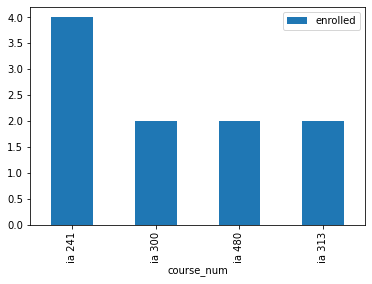

In [30]:
df = pandas.read_sql_query(sql_stat,conn)

df.plot.bar(x= 'course_num', y='enrolled')

# Q4

In [45]:
sql_stat = """
                select gp12.professor.p_name,
                    count(gp12.course.course_name) as teaching_number
                from gp12.professor
                inner join gp12.course
                on gp12.professor.p_email = gp12.course.p_email
                group by professor.p_name
                order by teaching_number desc
                            
 """       

In [46]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,p_name,teaching_number
0,john,2
1,tim walton,1
2,orlandrew danzell,1
3,noel hendrickson,1


<AxesSubplot:xlabel='p_name'>

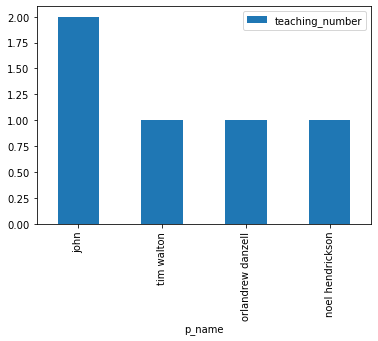

In [49]:
df = pandas.read_sql_query(sql_stat,conn)

df.plot.bar(x= 'p_name', y='teaching_number')

# Q5

In [10]:
sql_stat = """
                insert into gp12.professor(p_email,p_name,p_office)
                values('old_p@jmu.edu','old_p','old_office')
"""

In [11]:
conn.rollback()

In [12]:
cur.execute(sql_stat)

In [13]:
conn.commit()

In [14]:
df = pandas.read_sql_query("select * from gp12.professor",conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,orlandrew danzell,isat/cs107
1,hendrinx@jmu.edu,noel hendrickson,isat/cs322
2,waltontr@jmu.edu,tim walton,isat/cs326
3,ia340@jmu.edu,john,engeo901
4,old_p@jmu.edu,old_p,old_office


# Q6

In [21]:
q6_update_course_sql = """
                        update gp12.course
                        set p_email = '{}'
                        where p_email = '{}'
                        """.format('ia340@jmu.edu','old_p@jmu.edu')

In [22]:
cur.execute(q6_update_course_sql)

In [23]:
conn.commit()

In [27]:
df = pandas.read_sql_query('select * from gp12.course',conn)
df[:]

,course_num,course_name,course_room_num,p_email
0,ia 480,selected topics in intelligence analysis,148,danzelox@jmu.edu
1,ia 313,counterfactual reasoning,1203,hendrinx@jmu.edu
2,ia 400,intro to ia,engeo1999,ia340@jmu.edu
3,ia 300,seminar in intelligence analysis,150,ia340@jmu.edu
4,ia 241,hypothesis testing,111,waltontr@jmu.edu


In [28]:
conn.rollback()

In [29]:
q6_delete_professor_sql = """
                        delete from gp12.professor
                        where p_email = '{}'
                        """.format('old_p@jmu.edu')

In [30]:
cur.execute(q6_delete_professor_sql)

In [31]:
conn.commit()

In [32]:
df = pandas.read_sql_query('select * from gp12.professor',conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,orlandrew danzell,isat/cs107
1,hendrinx@jmu.edu,noel hendrickson,isat/cs322
2,waltontr@jmu.edu,tim walton,isat/cs326
3,ia340@jmu.edu,john,engeo901


# close the cursor and connection

In [33]:
cur.close()

In [34]:
conn.close()